In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('train.csv')

In [152]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
no_embarked_ind = df[df['Embarked'].isnull()].index
df = df.drop(index =no_embarked_ind, axis = 0)

In [315]:
df.groupby('Cabin').mean()['Survived'].unique()

array([0.        , 1.        , 0.5       , 0.33333333, 0.66666667])

In [316]:
len(df['Ticket'].unique())

680

In [8]:
len(df['Cabin'].unique())

148

<AxesSubplot:xlabel='Survived', ylabel='count'>

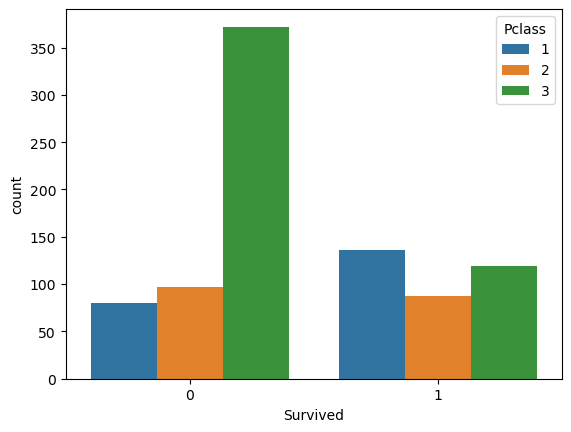

In [12]:
sns.countplot(data = df, x = 'Survived', hue = 'Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

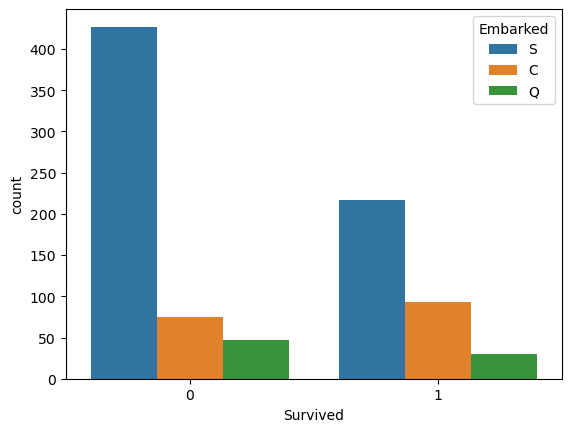

In [13]:
sns.countplot(data = df, x = 'Survived', hue = 'Embarked')

In [149]:
all_data = df.append(test_set)

In [109]:
all_data['Survived'].isnull().sum()

417

In [154]:
X = df.drop(['PassengerId','Survived','Name','Cabin'], axis = 1)
y = df['Survived']

In [155]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,S
887,1,female,19.0,0,0,112053,30.0000,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,male,26.0,0,0,111369,30.0000,C


In [70]:
X.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin         0
Embarked      0
dtype: int64

In [323]:
X.groupby('Pclass').mean()['Age']

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [156]:
X['Age'] = X['Age'].fillna(X.groupby('Pclass')['Age'].transform('mean'))

In [158]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [157]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.00000,1,0,A/5 21171,7.2500,S
1,1,female,38.00000,1,0,PC 17599,71.2833,C
2,3,female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.00000,1,0,113803,53.1000,S
4,3,male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.00000,0,0,211536,13.0000,S
887,1,female,19.00000,0,0,112053,30.0000,S
888,3,female,25.14062,1,2,W./C. 6607,23.4500,S
889,1,male,26.00000,0,0,111369,30.0000,C


In [215]:
X['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 30.72664459,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       27.74517375, 34.        , 15.        , 28.        ,  8.        ,
       19.        , 40.        , 66.        , 42.        , 21.        ,
       18.        ,  3.        ,  7.        , 49.        , 29.        ,
       65.        , 28.5       ,  5.        , 11.        , 45.        ,
       17.        , 32.        , 16.        , 25.        ,  0.83      ,
       30.        , 33.        , 23.        , 24.        , 46.        ,
       59.        , 71.        , 37.        , 47.        , 14.5       ,
       70.5       , 32.5       , 12.        ,  9.        , 36.5       ,
       51.        , 55.5       , 40.5       , 44.        ,  1.        ,
       61.        , 56.        , 50.        , 36.        , 45.5       ,
       20.5       , 62.        , 41.        , 52.        , 63.  

In [159]:
X['Pclass'] = X['Pclass'].apply(lambda x: str(x))

In [160]:
X = X.drop('Ticket', axis = 1)

In [161]:
X = pd.get_dummies(data = X, drop_first=True)

In [162]:
X

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.00000,1,0,7.2500,0,1,1,0,1
1,38.00000,1,0,71.2833,0,0,0,0,0
2,26.00000,0,0,7.9250,0,1,0,0,1
3,35.00000,1,0,53.1000,0,0,0,0,1
4,35.00000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,0,1,0,1
887,19.00000,0,0,30.0000,0,0,0,0,1
888,25.14062,1,2,23.4500,0,1,0,0,1
889,26.00000,0,0,30.0000,0,0,1,0,0


In [137]:
Train_X = X.iloc[:889]

In [120]:
Train_X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
884,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,3,female,39.0,0,5,382652,29.1250,Q
886,2,male,27.0,0,0,211536,13.0000,S
887,1,female,19.0,0,0,112053,30.0000,S


In [138]:
Test_X = X.iloc[890:]

In [122]:
Test_X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
890,3,male,32.0,0,0,370376,7.7500,Q
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,108.9000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,NaN,0,0,359309,8.0500,S


In [139]:
 y = y[:889]

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [164]:
scaler = StandardScaler()

In [165]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [166]:
scaled_X_train

array([[-0.25498892, -0.48216438, -0.47784434, ..., -1.36376262,
        -0.31714837,  0.61664896],
       [ 0.11724818,  0.39081909,  0.72875257, ..., -1.36376262,
        -0.31714837,  0.61664896],
       [ 0.11724818, -0.48216438, -0.47784434, ...,  0.73326544,
        -0.31714837,  0.61664896],
       ...,
       [ 1.38285431, -0.48216438, -0.47784434, ..., -1.36376262,
        -0.31714837,  0.61664896],
       [-0.62722602,  1.26380257,  1.93534949, ..., -1.36376262,
        -0.31714837,  0.61664896],
       [ 0.26614302, -0.48216438, -0.47784434, ...,  0.73326544,
        -0.31714837,  0.61664896]])

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
# grid = dict(n_estimators=np.arange(32,100),
#              max_features =

In [168]:
model = RandomForestClassifier(criterion='gini',
                                n_estimators=700,
                                min_samples_split=10,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                n_jobs=-1)

In [169]:
model.fit(scaled_X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=700, n_jobs=-1)

In [170]:
pred = model.predict(scaled_X_test)

In [24]:
from sklearn.metrics import classification_report, plot_confusion_matrix

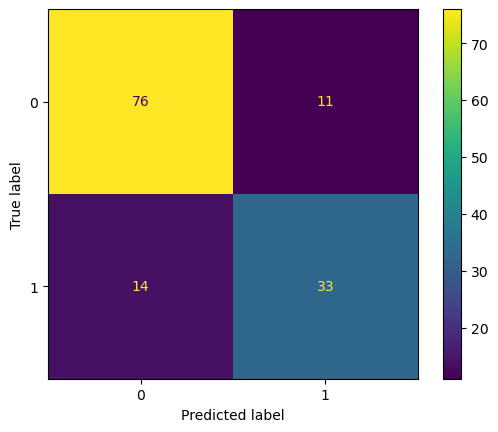

In [171]:
plot_confusion_matrix(model,scaled_X_test, y_test)

In [172]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        87
           1       0.75      0.70      0.73        47

    accuracy                           0.81       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.81      0.81      0.81       134



In [177]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [225]:
adaBoost = GradientBoostingClassifier(n_estimators=150, max_depth=5)

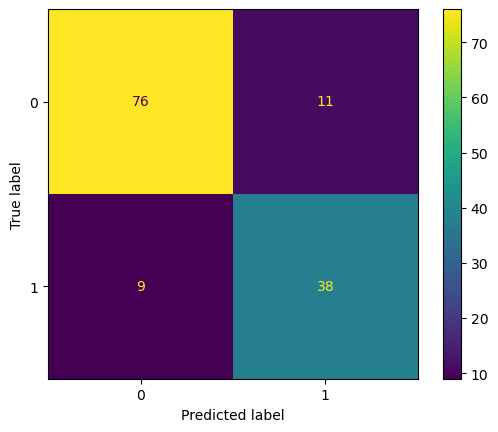

In [226]:
adaBoost.fit(scaled_X_train, y_train)
pred = adaBoost.predict(scaled_X_test)
plot_confusion_matrix(adaBoost,scaled_X_test, y_test)

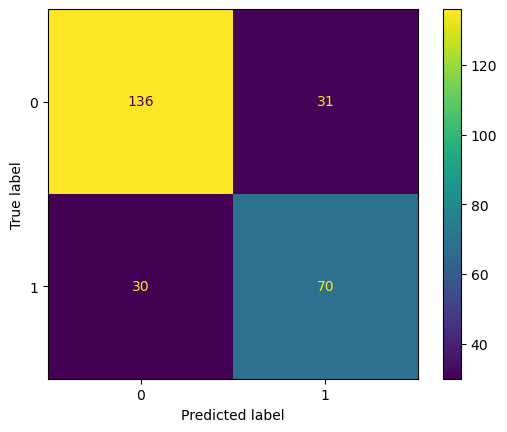

In [207]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        87
           1       0.78      0.81      0.79        47

    accuracy                           0.85       134
   macro avg       0.83      0.84      0.84       134
weighted avg       0.85      0.85      0.85       134



In [208]:
adaBoost.fit(scaled_X_test, y_test)

GradientBoostingClassifier(max_depth=5, n_estimators=150)

In [209]:
test_set = pd.read_csv('test.csv')

In [210]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [211]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [212]:
test_set['Cabin'] = test_set['Cabin'].fillna(0)

In [213]:
test_set['Fare'] = test_set['Fare'].fillna(test_set['Fare'].mean())

In [214]:
test_set.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [215]:
test_set['Age'] = test_set['Age'].fillna(test_set.groupby('Pclass')['Age'].transform('mean'))

In [216]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [217]:
test_set['Pclass'] = test_set['Pclass'].apply(lambda x : str(x))

In [218]:
test_set = pd.get_dummies(data = test_set.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1), drop_first=True)

In [219]:
test_set

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.500000,0,0,7.8292,0,1,1,1,0
1,47.000000,1,0,7.0000,0,1,0,0,1
2,62.000000,0,0,9.6875,1,0,1,1,0
3,27.000000,0,0,8.6625,0,1,1,0,1
4,22.000000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,24.027945,0,0,8.0500,0,1,1,0,1
414,39.000000,0,0,108.9000,0,0,0,0,0
415,38.500000,0,0,7.2500,0,1,1,0,1
416,24.027945,0,0,8.0500,0,1,1,0,1


In [51]:
main_X_columns = pd.DataFrame(columns = X.columns)

In [52]:
main_X_columns

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S


In [53]:
new_test_set = main_X_columns.append(test_set)

In [54]:
new_test_set

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_D38,Cabin_D40,Cabin_D43,Cabin_E39 E41,Cabin_E45,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57
0,34.500000,0,0,7.8292,0,1,1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.000000,1,0,7.0000,0,1,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.000000,0,0,9.6875,1,0,1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.000000,0,0,8.6625,0,1,1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.000000,1,1,12.2875,0,1,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24.027945,0,0,8.0500,0,1,1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,39.000000,0,0,108.9000,0,0,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,38.500000,0,0,7.2500,0,1,1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,24.027945,0,0,8.0500,0,1,1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
scaled_test = scaler.transform(test_set)
final_pred = adaBoost.predict(scaled_test)

In [221]:
len(final_pred)

418

In [228]:
answer = pd.read_csv('gender_submission.csv')
answer

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [229]:
answer_dict = dict(PassengerId=np.arange(892,1310), Survived=final_pred)
answer = pd.DataFrame(answer_dict)
answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [230]:
answer.to_csv('answer.csv', index = None)